In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower_names'] = df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
X = df.drop(['target','flower_names'],axis = 'columns')
Y = df.target

In [10]:
X_train,X_test,Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state =1)

In [11]:
len(X_train)


120

In [12]:
len(Y_train)

120

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


In [15]:
knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.score(X_test,Y_test)


1.0

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

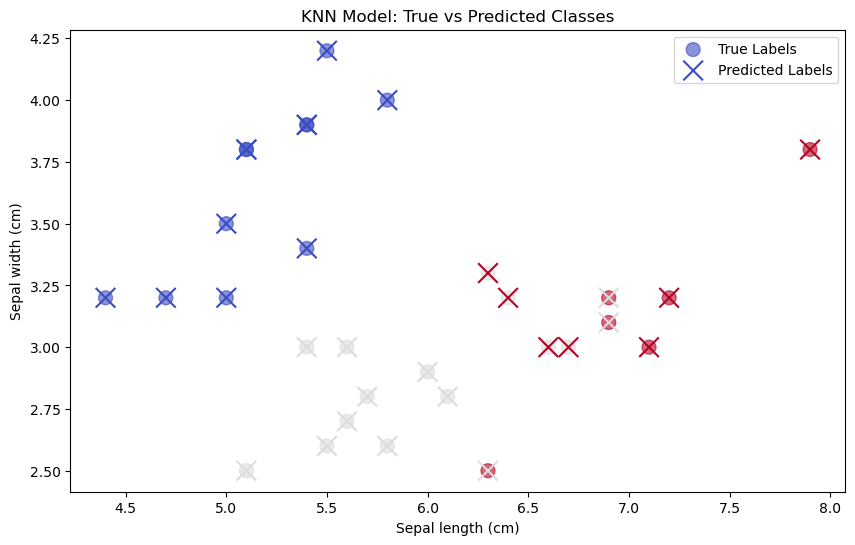

In [24]:
import matplotlib.pyplot as plt

y_pred = knn.predict(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], 
            c=Y_test, label='True Labels', cmap='coolwarm', s=100, alpha=0.6, marker='o')

plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], 
            c=y_pred, label='Predicted Labels', cmap='coolwarm', s=200, marker='x')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('KNN Model: True vs Predicted Classes')
plt.legend(["True Labels", "Predicted Labels"])
plt.show()
